In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/drive/notebooks/IMDB Dataset.csv')
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
X = df['review']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
my_model = Pipeline(steps=[
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('classifier', LogisticRegression())
])

result = my_model.fit(X_train, y_train)
predictions = result.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')

print(classification_report(y_test, predictions))

new_reviews = ["This movie was fantastic!", "I didn't like this film."]
new_sentiments = result.predict(new_reviews)

print('Predicted Sentiments for new reviews:')
for review, sentiment in zip(new_reviews, new_sentiments):
    print(f'Review: {review} | Predicted Sentiment: {sentiment}')


Accuracy: 0.8941
              precision    recall  f1-score   support

    negative       0.91      0.88      0.89      4961
    positive       0.88      0.91      0.90      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

Predicted Sentiments for new reviews:
Review: This movie was fantastic! | Predicted Sentiment: positive
Review: I didn't like this film. | Predicted Sentiment: negative


In [7]:
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(y_test,predictions)
confusion_df = pd.DataFrame(confusion_mat)
confusion_df

,0,1
0,4352,609
1,450,4589


In [8]:
%pip install seaborn

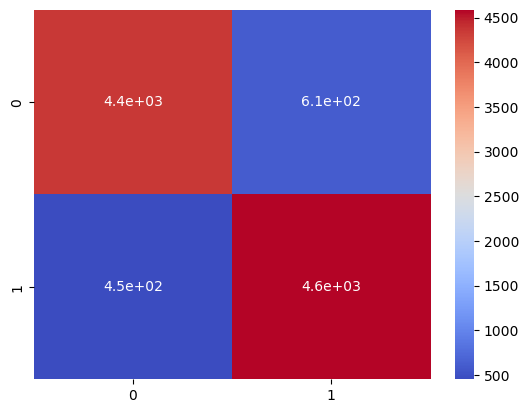

In [9]:
import seaborn as sns
gr = sns.heatmap(confusion_df,cmap='coolwarm',annot=True)